In [46]:
# Python
import pandas as pd
import numpy as np
from collections import OrderedDict
#
import importlib
import utilities.variables as variables
import utilities.utility as utility
import utilities.plots as plots
import utilities.prophet_utils as prophet_utils
import utilities.mpt_utils as mpt_utils
from utilities.mpt_utils import get_portfolio_real_return_rate

importlib.reload(variables)
importlib.reload(utility)
importlib.reload(plots)
importlib.reload(prophet_utils)
#
import logging
logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

In [47]:
# Includes by default percentage values
df = pd.read_csv('../../../data/df_monthly_prices_complete_euro.csv', index_col='Date')
df_pct = pd.read_csv('../../../data/df_monthly_returns_complete.csv', index_col='Date')
df_overview = pd.read_csv('../../../data/df_overview.csv', index_col=0)

### Train & Plot Methods

In [48]:
test_size_years = 1# variables.FIVE_YEARS_NR
# actual values
df_train = df_pct.head((int(variables.ALL_YEARS_NR - test_size_years) * 12) - 1).tail(20 * 12) # +1 = exclude last item of tail (it is part of test)
df_test = df_pct.tail(test_size_years * 12)

### 1 Month Actual vs Prediction

In [49]:
importlib.reload(prophet_utils)
importlib.reload(plots)

forecasts_1m, models_1m = prophet_utils.train_predict(dataframe=df_train, months=1)
# 
plots.plot_lines_actual_vs_predicted(df_pct=df_train, forecasts=forecasts_1m, months=1)

#### Allocation - 1 Month

In [141]:
importlib.reload(prophet_utils)
importlib.reload(mpt_utils)

df_forecast_1m = prophet_utils.get_df_from_forecast(forecasts_1m)
df_forecast_1m = df_forecast_1m - 1
df_forecast_1m  # (0.02 for 2%)

weights_1m, mu_1m, S_1m, allocations_1m, weights_all_1m = mpt_utils.portfolio_and_plot(df_forecast_1m, df, plot_threshold=0.015)

Expected annual return: 91.2%
Annual volatility: 8.6%
Sharpe Ratio: 10.37
-- Allocation --
{'GME': 3, '6460.T': 21, 'CPRX': 14, 'GROW.L': 1, 'CVNA': 3, 'ENPH': 1, '8057.T': 2, 'CRTO': 5, 'PECO': 2, 'TPL': 1, 'MRNA': 1, '2733.T': 5, 'MNDY': 1, 'PEN': 1, 'TEAM': 1, 'BOOT': 1, '4980.T': 3, 'SAIA': 1, 'DLAR.L': 1, 'APP': 3, '8111.T': 1, '7846.T': 2, '6750.T': 8, 'RUN': 7, '4619.T': 10, 'APLD': 10, 'JBL': 1, 'HOV': 1, 'PAR': 2, '3493.T': 1, 'MEDP': 1, '9468.T': 3, 'AMD': 1, 'IIPR': 1, 'DAVA': 1, 'ARHS': 10, '6845.T': 2, 'SFM': 1, '2792.T': 8, 'DELL': 1, 'BEZ.L': 1, 'VTSC.DE': 1, 'G24.DE': 1, 'IOT': 3, 'PWSC': 3, 'ZS': 1, '7451.T': 2, '7984.T': 3, 'BLD': 1, 'ETSY': 1, '8173.T': 4, 'FTK.DE': 5, '7250.T': 6, 'KD': 5, '7458.T': 3, '7552.T': 3, 'SNWS.L': 1, '8130.T': 2, 'NTNX': 1, '9882.T': 4, 'THRY': 2, 'CALX': 1, 'SLP': 1, '3994.T': 1, 'OMI': 3, '8079.T': 1, '9434.T': 3, '3341.T': 4, '8008.T': 4, 'GIII': 1, 'FINV': 8, '7575.T': 6, '9069.T': 5, 'CNM': 1, '5105.T': 2, 'INFA': 2, '1973.T': 2, '81

/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/pypfopt/discrete_allocation.py:27: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



#### Actual return rate

In [151]:
importlib.reload(mpt_utils)
#
mpt_utils.get_portfolio_real_return_rate(df_pct, df_forecast_1m, weights=weights_all_1m)

Portfolio real return rate:  0.15%


#### Overview table - 1 Month

In [143]:
importlib.reload(mpt_utils)
# Create overview
mpt_utils.generate_overview_table(allocations_1m, mu_1m, S_1m, df_pct)

,Share Count,Average Covariance,Average Returns,Return Last 12 Months,Return (Actual) Next 12 Months
GME,3,-0.173143,21.31%,-50.30%,43.64%
6460.T,21,0.034476,-1.93%,29.36%,8.14%
CPRX,14,0.017333,13.36%,-9.61%,62.27%
GROW.L,1,0.017905,-6.85%,-26.95%,-44.60%
CVNA,3,0.008667,11.08%,98.50%,211.25%
...,...,...,...,...,...
9842.T,1,0.005714,11.96%,11.89%,10.58%
7780.T,1,0.012381,3.35%,-32.39%,-31.53%
HEAR,1,0.008952,56.61%,4.64%,50.31%
3050.T,1,0.005905,1.65%,3.66%,25.78%


### 6 months Actual vs Prediction

In [52]:
importlib.reload(prophet_utils)
importlib.reload(plots)

forecasts_6m, models_6m  = prophet_utils.train_predict(dataframe=df_train, months=6)
#
plots.plot_lines_actual_vs_predicted(df_pct=df_train, forecasts=forecasts_6m, months=6)


#### Allocation

In [53]:
importlib.reload(prophet_utils)

df_forecast_6m = prophet_utils.get_df_from_forecast(forecasts_6m)
df_forecast_6m = df_forecast_6m - 1
df_forecast_6m # (0.02 for 2%)

,1911.T,1925.T,1928.T,1973.T,2120.T,2124.T,2146.T,2154.T,2170.T,2327.T,...,XYL,YETI,YOU.L,YUMC,ZBRA,ZD,ZS,ZTS,ZUMZ,ZWS
ds,,,,,,,,,,,,,,,,,,,,,
2003-10-01,0.027312,0.063505,0.035210,-0.008658,0.002314,0.152917,0.075564,0.023302,0.037401,0.077947,...,0.029576,0.048997,0.080021,-0.008717,0.093549,0.074829,0.011188,0.003518,0.106010,0.018353
2003-11-01,0.004144,-0.018425,0.005263,0.004063,0.138641,0.137650,-0.037569,-0.006620,-0.052502,-0.052859,...,0.005364,0.015531,0.037196,0.035093,0.020004,-0.023786,0.007144,0.015052,-0.055926,0.019790
2003-12-01,-0.009748,0.031028,-0.027690,0.026671,0.052654,0.106782,0.044017,-0.006225,-0.034160,-0.008369,...,-0.004084,0.011722,-0.009100,0.008432,-0.037446,-0.010521,0.018734,-0.010943,0.035393,-0.023383
2004-01-01,-0.019153,0.006010,-0.010100,-0.002414,0.039038,0.234428,0.016024,0.013179,0.089009,-0.045468,...,-0.001950,0.024949,0.006197,0.003129,0.002835,0.004071,-0.009794,-0.017750,0.023555,0.011937
2004-02-01,0.012198,-0.023569,0.019708,0.003163,-0.056118,0.440759,0.050710,0.082355,0.020991,-0.006898,...,-0.001769,-0.000184,0.050556,-0.017259,0.029488,0.006061,-0.035092,-0.007118,0.006748,0.018501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-31,0.026088,-0.069758,0.033971,-0.009126,0.100268,-0.027463,-0.341144,-0.075607,-0.239631,-0.136294,...,-0.012350,-0.003993,0.044086,0.097063,-0.037176,-0.167726,0.070587,0.038292,-0.225889,0.002474
2023-11-30,-0.073887,0.026771,-0.145315,0.039754,0.009225,-0.253950,0.045822,-0.145707,-0.155786,0.042235,...,0.020602,0.045235,-0.102137,0.038757,-0.083158,-0.033076,0.078753,-0.010598,0.126698,-0.017956
2023-12-31,0.021517,0.027022,-0.002167,0.026734,-0.005786,0.338121,-0.013358,0.031048,0.183594,-0.107522,...,0.029953,0.086725,0.043406,-0.024065,0.051903,0.016367,0.085881,0.009444,0.005502,0.059521


In [70]:
importlib.reload(mpt_utils)

weights_6m, mu_6m, S_6m, allocations_6m, weights_all_6m = mpt_utils.portfolio_and_plot(df_forecast_6m, df, plot_threshold=0.015)

Expected annual return: 44.0%
Annual volatility: 9.1%
Sharpe Ratio: 4.64
-- Allocation --
{'CPRX': 14, 'GROW.L': 1, 'ENPH': 2, '6460.T': 12, 'CVNA': 3, 'HOV': 1, '8057.T': 2, 'SMCI': 1, '7564.T': 2, 'ACLS': 1, 'BOOT': 1, 'PEN': 1, 'TPL': 1, 'AMD': 1, '4980.T': 3, 'APLD': 13, 'MRNA': 1, 'PAR': 2, '4816.T': 3, 'SAIA': 1, 'TEAM': 1, '2395.T': 7, 'BLD': 1, '8111.T': 1, 'MEDP': 1, '7868.T': 13, 'AVGO': 1, 'CAR': 1, 'DFIN': 1, 'DELL': 1, 'SFM': 1, 'ANET': 1, '6430.T': 1, '6200.T': 10, 'LSCC': 1, 'NVDA': 1, '9468.T': 3, '7846.T': 2, '2733.T': 3, 'PECO': 1, '4812.T': 1, 'EVRI': 5, 'RUN': 5, '8154.T': 1, '8130.T': 2, 'SLP': 1, '8008.T': 5, '8173.T': 4, 'THRY': 3, '7984.T': 3, 'MNDY': 1, 'NTNX': 1, '7451.T': 2, '9413.T': 2, 'FTK.DE': 5, 'JBL': 1, 'APP': 1, '7906.T': 4, 'CRTO': 2, '2760.T': 1, '8079.T': 1, 'MPWR': 1, '8060.T': 1, 'YUMC': 1, '6750.T': 4, '6055.T': 2, '9101.T': 1, '2120.T': 34, 'CALX': 1, 'LAUR': 2, '7990.T': 2, '7976.T': 3, 'BCYC': 2, '2767.T': 1, '6845.T': 1, 'PSTG': 1, '1973.T':

/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/pypfopt/discrete_allocation.py:27: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



#### Actual return rate

In [139]:
importlib.reload(mpt_utils)
#
mpt_utils.get_portfolio_real_return_rate(df_pct, df_forecast_6m, weights=weights_all_6m)

Portfolio real return rate:  0.59%


#### Overview

In [56]:
importlib.reload(mpt_utils)
# Create overview
mpt_utils.generate_overview_table(allocations_6m, mu_6m, S_6m, df_pct)

,Share Count,Average Covariance,Average Returns,Return Last 12 Months,Return (Actual) Next 12 Months
CPRX,14,-0.014248,23.20%,-9.61%,62.27%
GROW.L,1,-0.010354,-3.30%,-26.95%,-44.60%
ENPH,2,-0.040973,28.24%,-74.11%,-13.52%
6460.T,12,-0.010442,-5.58%,29.36%,8.14%
CVNA,3,0.000354,33.44%,98.50%,211.25%
...,...,...,...,...,...
6183.T,1,0.004956,29.95%,15.89%,0.94%
3608.T,1,0.007434,35.59%,81.27%,12.53%
ARLO,1,-0.013805,10.97%,61.86%,7.60%
3050.T,1,0.004779,55.94%,3.66%,25.78%


### 12 months Actual vs Prediction

In [57]:
importlib.reload(prophet_utils)
importlib.reload(plots)

forecasts_12m, models_12m  = prophet_utils.train_predict(dataframe=df_train, months=12)
#
plots.plot_lines_actual_vs_predicted(df_pct=df_train, forecasts=forecasts_12m, months=12)

In [58]:
forecasts_12m['1911.T']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-10-01,1.009411,0.918469,1.129683,1.009411,1.009411,0.017901,0.017901,0.017901,0.017901,0.017901,0.017901,0.0,0.0,0.0,1.027312
1,2003-11-01,1.009514,0.897144,1.111900,1.009514,1.009514,-0.005370,-0.005370,-0.005370,-0.005370,-0.005370,-0.005370,0.0,0.0,0.0,1.004144
2,2003-12-01,1.009613,0.882443,1.102589,1.009613,1.009613,-0.019361,-0.019361,-0.019361,-0.019361,-0.019361,-0.019361,0.0,0.0,0.0,0.990252
3,2004-01-01,1.009715,0.875129,1.085881,1.009715,1.009715,-0.028868,-0.028868,-0.028868,-0.028868,-0.028868,-0.028868,0.0,0.0,0.0,0.980847
4,2004-02-01,1.009817,0.907147,1.117156,1.009817,1.009817,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.0,0.0,0.0,1.012198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2024-04-30,1.034280,0.897628,1.117986,1.034280,1.034281,-0.032141,-0.032141,-0.032141,-0.032141,-0.032141,-0.032141,0.0,0.0,0.0,1.002139
248,2024-05-31,1.034384,0.911867,1.122589,1.034384,1.034384,-0.016298,-0.016298,-0.016298,-0.016298,-0.016298,-0.016298,0.0,0.0,0.0,1.018086
249,2024-06-30,1.034484,0.920746,1.121912,1.034484,1.034484,-0.014968,-0.014968,-0.014968,-0.014968,-0.014968,-0.014968,0.0,0.0,0.0,1.019516
250,2024-07-31,1.034587,0.883036,1.091508,1.034587,1.034588,-0.042350,-0.042350,-0.042350,-0.042350,-0.042350,-0.042350,0.0,0.0,0.0,0.992237


#### Allocation - 12M

Generate return dataframe from Prophet dictionary

In [59]:
importlib.reload(prophet_utils)

df_forecast_12m = prophet_utils.get_df_from_forecast(forecasts_12m)
df_forecast_12m = df_forecast_12m - 1
df_forecast_12m # (0.02 for 2%)

,1911.T,1925.T,1928.T,1973.T,2120.T,2124.T,2146.T,2154.T,2170.T,2327.T,...,XYL,YETI,YOU.L,YUMC,ZBRA,ZD,ZS,ZTS,ZUMZ,ZWS
ds,,,,,,,,,,,,,,,,,,,,,
2003-10-01,0.027312,0.063505,0.035210,-0.008658,0.002314,0.152917,0.075564,0.023302,0.037401,0.077947,...,0.029576,0.048997,0.080021,-0.008717,0.093549,0.074829,0.011188,0.003518,0.106010,0.018353
2003-11-01,0.004144,-0.018425,0.005263,0.004063,0.138641,0.137650,-0.037569,-0.006620,-0.052502,-0.052859,...,0.005364,0.015531,0.037196,0.035093,0.020004,-0.023786,0.007144,0.015052,-0.055926,0.019790
2003-12-01,-0.009748,0.031028,-0.027690,0.026671,0.052654,0.106782,0.044017,-0.006225,-0.034160,-0.008369,...,-0.004084,0.011722,-0.009100,0.008432,-0.037446,-0.010521,0.018734,-0.010943,0.035393,-0.023383
2004-01-01,-0.019153,0.006010,-0.010100,-0.002414,0.039038,0.234428,0.016024,0.013179,0.089009,-0.045468,...,-0.001950,0.024949,0.006197,0.003129,0.002835,0.004071,-0.009794,-0.017750,0.023555,0.011937
2004-02-01,0.012198,-0.023569,0.019708,0.003163,-0.056118,0.440759,0.050710,0.082355,0.020991,-0.006898,...,-0.001769,-0.000184,0.050556,-0.017259,0.029488,0.006061,-0.035092,-0.007118,0.006748,0.018501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30,0.002139,0.014642,-0.006417,0.013195,0.004492,0.106525,0.001716,-0.082413,-0.053226,-0.023960,...,0.001559,-0.108958,-0.003778,-0.026222,0.028564,-0.071995,0.060094,0.024734,-0.051834,0.003335
2024-05-31,0.018086,0.007156,-0.009768,0.033919,-0.015765,0.032267,0.151667,0.034719,0.042454,0.024587,...,0.070314,0.207830,-0.004063,0.053285,0.059004,0.081884,0.130484,0.021288,0.009155,0.095398
2024-06-30,0.019516,0.013829,-0.015765,0.003966,-0.019120,0.044716,0.067475,0.018953,0.061787,0.016368,...,-0.006248,0.087266,0.036831,0.011156,0.003402,-0.015517,0.036976,0.016892,0.022964,-0.011149


In [60]:
importlib.reload(mpt_utils)

weights_12m, mu_12m, S_12m, allocations_12m = mpt_utils.portfolio_and_plot(df_forecast_12m, df, plot_threshold=0.017)

Expected annual return: 45.1%
Annual volatility: 9.3%
Sharpe Ratio: 4.65
-- Allocation --
{'CPRX': 13, '6460.T': 13, 'ENPH': 1, 'GROW.L': 1, 'CVNA': 3, 'HOV': 1, 'MRNA': 2, '7564.T': 1, 'SMCI': 1, '8057.T': 2, 'ACLS': 1, 'BOOT': 1, 'PEN': 1, '4980.T': 3, 'SAIA': 1, 'AMD': 1, 'TPL': 1, 'APLD': 12, '7868.T': 16, 'PAR': 2, 'LSCC': 1, '4816.T': 3, 'PLUS.L': 1, 'SFM': 2, '6200.T': 12, '6430.T': 1, '8111.T': 1, '9468.T': 3, 'DELL': 1, 'EVRI': 5, '8130.T': 3, 'PECO': 1, 'DFIN': 1, '2395.T': 5, '4812.T': 1, '8154.T': 1, 'FTK.DE': 5, '7906.T': 4, '8173.T': 4, 'THRY': 3, 'LAUR': 3, 'SLP': 1, '7846.T': 1, 'CRTO': 2, 'RUN': 5, '2733.T': 2, 'NTNX': 1, '7451.T': 2, 'EXC': 1, '8008.T': 5, '7984.T': 3, '9413.T': 2, 'APP': 1, 'CALX': 1, '6845.T': 1, 'KTB': 1, '6750.T': 4, '9101.T': 1, '3659.T': 2, '1973.T': 2, '8060.T': 1, '7552.T': 2, '8022.T': 1, 'OMI': 2, '9434.T': 3, '9882.T': 3, '2760.T': 1, '7458.T': 2, 'FINV': 8, '7976.T': 3, '2471.T': 19, '6055.T': 2, '2792.T': 4, '6417.T': 3, '3994.T': 1, '799

/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/pypfopt/discrete_allocation.py:27: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



#### Actual return rate

In [138]:
importlib.reload(mpt_utils)
#
mpt_utils.get_portfolio_real_return_rate(df_pct, df_forecast_12m, weights=weights_all_12m)

Portfolio real return rate:  29.58%


#### Overview - 12 Months

In [61]:
importlib.reload(mpt_utils)
# Create overview
mpt_utils.generate_overview_table(allocations_12m, mu_12m, S_12m, df_pct)

,Share Count,Average Covariance,Average Returns,Return Last 12 Months,Return (Actual) Next 12 Months
CPRX,13,-0.000417,24.53%,-9.61%,62.27%
6460.T,13,0.004271,-4.63%,29.36%,8.14%
ENPH,1,-0.059896,27.68%,-74.11%,-13.52%
GROW.L,1,-0.018958,-9.43%,-26.95%,-44.60%
CVNA,3,-0.001875,33.97%,98.50%,211.25%
...,...,...,...,...,...
9069.T,2,-0.020417,27.78%,6.97%,19.62%
TAL,1,0.008958,190.82%,84.94%,-17.19%
9470.T,3,0.005729,29.44%,-10.92%,17.16%
3076.T,1,0.016771,10.92%,7.53%,6.56%


## Plotting

In [62]:
df_pct

,GME,2124.T,2491.T,2471.T,3046.T,PAT.DE,CROX,AOF.DE,SFQ.DE,DAN,...,KREF,HLN.L,DBX,BNL,CBL,KVUE,PSTL,NTST,BLCO,NBS.L
Date,,,,,,,,,,,,,,,,,,,,,
1999-11-01,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1999-12-01,1.05,0.95,1.10,1.01,1.08,1.10,1.23,1.00,0.59,1.04,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2000-01-01,0.91,1.02,1.00,0.99,0.92,0.98,0.77,1.00,1.07,0.61,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
2000-02-01,1.30,7.37,7.63,5.87,3.40,9.23,8.43,1.00,8.14,7.46,...,1.00,0.97,1.12,1.05,1.00,1.03,0.98,0.99,0.99,1.01
2000-03-01,1.00,1.00,1.00,1.00,1.00,1.00,1.00,9.32,1.00,0.88,...,1.00,1.00,0.93,1.00,1.00,1.00,1.00,1.00,1.00,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,2.09,0.87,1.09,1.08,1.11,0.96,1.25,0.92,0.97,1.13,...,1.01,0.96,0.97,1.05,1.02,1.03,0.97,1.03,1.06,0.98
2024-06-01,1.07,0.99,1.00,0.98,1.06,0.89,0.94,0.98,1.05,0.87,...,0.96,0.99,1.00,1.03,1.06,0.95,1.01,0.93,0.95,1.00
2024-07-01,0.92,1.10,1.02,0.98,1.17,1.07,0.92,1.22,1.08,1.05,...,1.30,1.08,1.06,1.12,1.12,1.02,1.12,1.04,1.19,1.00


In [63]:
forecasts_12m['1911.T']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-10-01,1.009411,0.918469,1.129683,1.009411,1.009411,0.017901,0.017901,0.017901,0.017901,0.017901,0.017901,0.0,0.0,0.0,1.027312
1,2003-11-01,1.009514,0.897144,1.111900,1.009514,1.009514,-0.005370,-0.005370,-0.005370,-0.005370,-0.005370,-0.005370,0.0,0.0,0.0,1.004144
2,2003-12-01,1.009613,0.882443,1.102589,1.009613,1.009613,-0.019361,-0.019361,-0.019361,-0.019361,-0.019361,-0.019361,0.0,0.0,0.0,0.990252
3,2004-01-01,1.009715,0.875129,1.085881,1.009715,1.009715,-0.028868,-0.028868,-0.028868,-0.028868,-0.028868,-0.028868,0.0,0.0,0.0,0.980847
4,2004-02-01,1.009817,0.907147,1.117156,1.009817,1.009817,0.002381,0.002381,0.002381,0.002381,0.002381,0.002381,0.0,0.0,0.0,1.012198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2024-04-30,1.034280,0.897628,1.117986,1.034280,1.034281,-0.032141,-0.032141,-0.032141,-0.032141,-0.032141,-0.032141,0.0,0.0,0.0,1.002139
248,2024-05-31,1.034384,0.911867,1.122589,1.034384,1.034384,-0.016298,-0.016298,-0.016298,-0.016298,-0.016298,-0.016298,0.0,0.0,0.0,1.018086
249,2024-06-30,1.034484,0.920746,1.121912,1.034484,1.034484,-0.014968,-0.014968,-0.014968,-0.014968,-0.014968,-0.014968,0.0,0.0,0.0,1.019516
250,2024-07-31,1.034587,0.883036,1.091508,1.034587,1.034588,-0.042350,-0.042350,-0.042350,-0.042350,-0.042350,-0.042350,0.0,0.0,0.0,0.992237


In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

errors = {}

for ticker, forecast in forecasts_12m.items():
    y_true = df_pct[[ticker]].loc[(df_pct.index >= (forecast['ds'].min() - pd.DateOffset(days=1)).strftime('%Y-%m-%d')) & (df_pct.index <= (forecast['ds'].max() + pd.DateOffset(days=1)).strftime('%Y-%m-%d'))]
    y_pred = forecast['yhat']
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    errors[ticker] = {'MAE': mae, 'RMSE': rmse}
#### Mean Absolute Error per Ticker

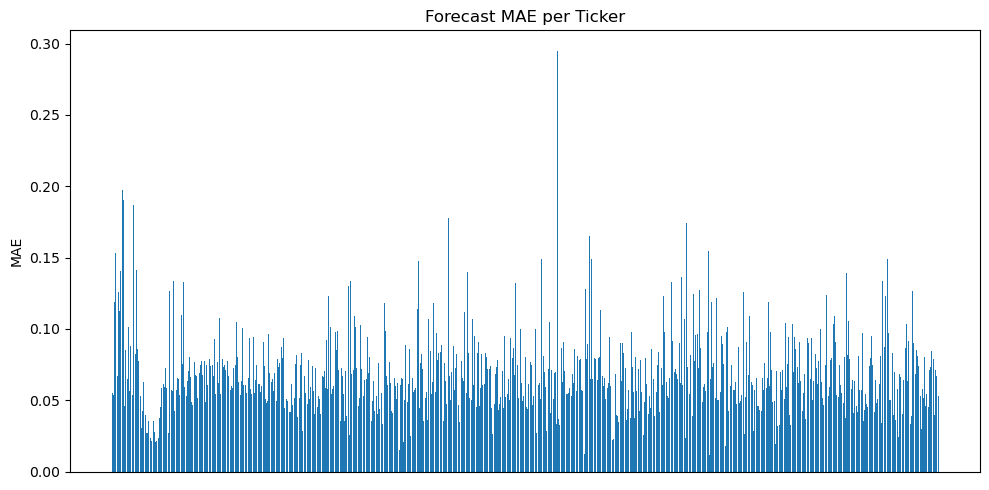

In [65]:
import matplotlib.pyplot as plt

tickers = list(errors.keys())
maes = [errors[t]['MAE'] for t in tickers]

plt.figure(figsize=(10, 5))
plt.bar(tickers, maes)
plt.ylabel('MAE')
plt.title('Forecast MAE per Ticker')
plt.xticks(ticks=[])
plt.tight_layout()
plt.show()
### Prophet forecast per ticket

In [66]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# selecting top 4 top performing tickers
tickers = df_pct.mean().sort_values(ascending=False)[11:15].index

# 2x2 subplot grid
fig = make_subplots(rows=2, cols=2, subplot_titles=tickers, horizontal_spacing=0.04, vertical_spacing=0.08)

for i, ticker in enumerate(tickers):
    row = i // 2 + 1
    col = i % 2 + 1

    forecast = forecasts_12m[ticker]

    # vertical line
    fig.add_trace(
        go.Scatter(x=forecast['ds'], y=forecast['yhat'], mode='lines', name='Forecast',
                   line=dict(color='blue'), showlegend=(i == 0)),
        row=row, col=col
    )

    fig.add_trace(
        go.Scatter(
            x=pd.concat([forecast['ds'], forecast['ds'][::-1]]),
            y=pd.concat([forecast['yhat_upper'][:288], forecast['yhat_lower'][::-1]]),
            fill='toself',
            fillcolor='rgba(0, 0, 255, 0.2)',
            line=dict(color='rgba(255,255,255,0)'),
            hoverinfo="skip",
            showlegend=(i == 0),
            name='Confidence Interval'
        ),
        row=row, col=col
    )

    # true values
    if 'true' in forecast.columns:
        fig.add_trace(
            go.Scatter(x=forecast['ds'], y=forecast['true'], mode='lines', name='Actual',
                       line=dict(color='black'), showlegend=(i == 0)),
            row=row, col=col
        )

# Layout settings
fig.update_layout(
    height=900,
    width=1200,
    title_text='Prophet Forecasts per Ticker',
    showlegend=False
)

fig.show()


#### Future insights

In [67]:
from prophet import Prophet
from prophet.plot import plot_components_plotly
#
fig2 = make_subplots(rows=2, cols=2, subplot_titles=tickers, horizontal_spacing=0.04, vertical_spacing=0.08)
#
plot_components_plotly(models_6m['MSFT'], forecasts_6m['MSFT'])